In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### importing the credit_score dataset

In [2]:
credit_score = pd.read_csv('credit_score.csv',low_memory=False)
credit_score = credit_score.drop(columns=['ID','Customer_ID','Name','SSN',
                                          'Type_of_Loan','Credit_History_Age'])
credit_score.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
credit_score.shape

(100000, 22)

In [4]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
credit_score.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
round(((credit_score.isnull().sum() / 100000)*100),2).astype('str')+'% of null values'

Month                        0.0% of null values
Age                          0.0% of null values
Occupation                   0.0% of null values
Annual_Income                0.0% of null values
Monthly_Inhand_Salary       15.0% of null values
Num_Bank_Accounts            0.0% of null values
Num_Credit_Card              0.0% of null values
Interest_Rate                0.0% of null values
Num_of_Loan                  0.0% of null values
Delay_from_due_date          0.0% of null values
Num_of_Delayed_Payment       7.0% of null values
Changed_Credit_Limit         0.0% of null values
Num_Credit_Inquiries        1.96% of null values
Credit_Mix                   0.0% of null values
Outstanding_Debt             0.0% of null values
Credit_Utilization_Ratio     0.0% of null values
Payment_of_Min_Amount        0.0% of null values
Total_EMI_per_month          0.0% of null values
Amount_invested_monthly     4.48% of null values
Payment_Behaviour            0.0% of null values
Monthly_Balance     

In [7]:
# Cleaning 'Age' column
credit_score['Age'] = credit_score['Age'].str.replace("-", "")
credit_score['Age'] = credit_score['Age'].str.replace("_", "")
credit_score['Age'] = credit_score['Age'].astype(int)

In [8]:
# Cleaning 'Occupation' column
credit_score['Occupation'] = credit_score['Occupation'].replace("-", np.nan)

In [9]:
# Cleaning and converting 'Annual_Income' column
credit_score['Annual_Income'] = credit_score['Annual_Income'].str.replace("-", "")
credit_score['Annual_Income'] = credit_score['Annual_Income'].str.replace("_", "")
credit_score['Annual_Income'] = credit_score['Annual_Income'].astype(float)

In [10]:
# Cleaning and converting 'Num_of_Loan' column
credit_score['Num_of_Loan'] = credit_score['Num_of_Loan'].str.replace("-", "")
credit_score['Num_of_Loan'] = credit_score['Num_of_Loan'].str.replace("_", "")
credit_score['Num_of_Loan'] = credit_score['Num_of_Loan'].astype(int)

In [11]:
# Cleaning and converting 'Num_of_Delayed_Payment' column
credit_score['Num_of_Delayed_Payment'] = credit_score['Num_of_Delayed_Payment'].str.replace("-", "")
credit_score['Num_of_Delayed_Payment'] = credit_score['Num_of_Delayed_Payment'].str.replace("_", "")
credit_score['Num_of_Delayed_Payment'] = credit_score['Num_of_Delayed_Payment'].astype(float)

In [12]:
# Encoding 'Credit_Score' column
credit_score['Credit_Score'] = credit_score['Credit_Score'].replace({"Poor": 0, "Standard": 1, "Good": 2})

C:\Users\Dell\AppData\Local\Temp\ipykernel_16992\1593311612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_score['Credit_Score'] = credit_score['Credit_Score'].replace({"Poor": 0, "Standard": 1, "Good": 2})


In [13]:
# Cleaning and converting 'Monthly_Balance' column
credit_score['Monthly_Balance'] = credit_score['Monthly_Balance'].str.replace("-", "")
credit_score['Monthly_Balance'] = credit_score['Monthly_Balance'].str.replace("_", "")
credit_score['Monthly_Balance'] = credit_score['Monthly_Balance'].astype(float)

In [14]:
# Cleaning 'Payment_Behaviour' column
credit_score['Payment_Behaviour'] = credit_score['Payment_Behaviour'].replace(r"[@#%]", np.nan, regex=True)

In [15]:
# Cleaning and converting 'Amount_invested_monthly' column
credit_score['Amount_invested_monthly'] = credit_score['Amount_invested_monthly'].str.replace("-", "")
credit_score['Amount_invested_monthly'] = credit_score['Amount_invested_monthly'].str.replace("_", "")
credit_score['Amount_invested_monthly'] = credit_score['Amount_invested_monthly'].astype(float)

In [16]:
# Encoding 'Payment_of_Min_Amount' column
credit_score['Payment_of_Min_Amount'] = credit_score['Payment_of_Min_Amount'].replace({"NM": 1, "No": 0})

In [17]:
# Cleaning and converting 'Outstanding_Debt' column
credit_score['Outstanding_Debt'] = credit_score['Outstanding_Debt'].str.replace("-", "")
credit_score['Outstanding_Debt'] = credit_score['Outstanding_Debt'].str.replace("_", "")
credit_score['Outstanding_Debt'] = credit_score['Outstanding_Debt'].astype(float)

In [18]:
# Cleaning 'Credit_Mix' column
credit_score['Credit_Mix'] = credit_score['Credit_Mix'].replace("-", np.nan)
credit_score['Credit_Mix'] = credit_score['Credit_Mix'].replace({"Standard": 1, "Good": 2, "Bad": 0})

In [19]:
# Cleaning and converting 'Changed_Credit_Limit' column
credit_score['Changed_Credit_Limit'] = credit_score['Changed_Credit_Limit'].str.replace("-", "")
credit_score['Changed_Credit_Limit'] = credit_score['Changed_Credit_Limit'].str.replace("_", "")
credit_score['Changed_Credit_Limit'] = credit_score['Changed_Credit_Limit'].replace("", np.nan)
credit_score['Changed_Credit_Limit'] = credit_score['Changed_Credit_Limit'].astype(float)

In [20]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [21]:
credit_score.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [22]:
credit_score = credit_score.fillna(method='ffill')
credit_score = credit_score.fillna(method='bfill')

C:\Users\Dell\AppData\Local\Temp\ipykernel_16992\1520471558.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  credit_score = credit_score.fillna(method='ffill')
C:\Users\Dell\AppData\Local\Temp\ipykernel_16992\1520471558.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  credit_score = credit_score.fillna(method='bfill')


In [23]:
credit_score.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

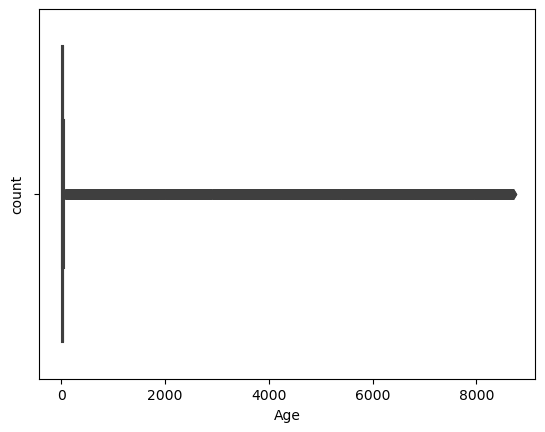

In [24]:
sns.boxplot(x=credit_score['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [25]:
col_names=['Age']
q1 = credit_score.Age.quantile(0.25)
q3 = credit_score.Age.quantile(0.75)
IQR = q3 - q1

credit_score = credit_score[(credit_score.Age >= q1-1.5*IQR) & (credit_score.Age <= q3+1.5*IQR)]

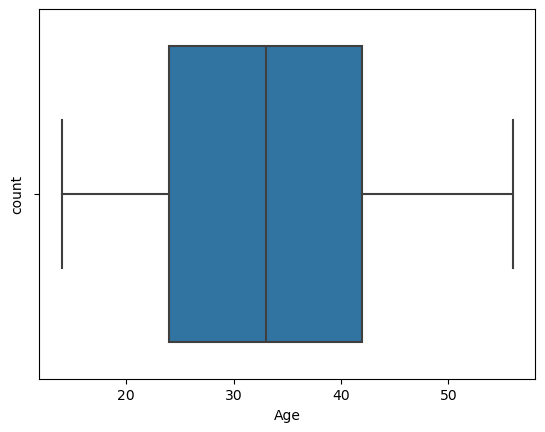

In [26]:
sns.boxplot(x=credit_score['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
credit_score['Month'] = le.fit_transform(credit_score['Month'])
credit_score['Occupation'] = le.fit_transform(credit_score['Occupation'])
credit_score['Payment_Behaviour'] = le.fit_transform(credit_score['Payment_Behaviour'])

In [29]:
credit_score = credit_score.drop(columns=['Credit_Mix','Payment_of_Min_Amount'])

In [30]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97219 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97219 non-null  int32  
 1   Age                       97219 non-null  int32  
 2   Occupation                97219 non-null  int32  
 3   Annual_Income             97219 non-null  float64
 4   Monthly_Inhand_Salary     97219 non-null  float64
 5   Num_Bank_Accounts         97219 non-null  int64  
 6   Num_Credit_Card           97219 non-null  int64  
 7   Interest_Rate             97219 non-null  int64  
 8   Num_of_Loan               97219 non-null  int32  
 9   Delay_from_due_date       97219 non-null  int64  
 10  Num_of_Delayed_Payment    97219 non-null  float64
 11  Changed_Credit_Limit      97219 non-null  float64
 12  Num_Credit_Inquiries      97219 non-null  float64
 13  Outstanding_Debt          97219 non-null  float64
 14  Credit_Util

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
col_list = []
for i in credit_score.columns:
    if((credit_score[i].dtype != 'object') & (i != 'Credit_Score')):
        col_list.append(i)
        
col_list

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [33]:
x = credit_score[col_list]
x.shape

(97219, 19)

In [34]:
vif_data = pd.DataFrame()
vif_data.shape

(0, 0)

In [35]:
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]

In [36]:
vif_data

,features,VIF
0,Month,0.299876
1,Age,0.094595
2,Occupation,0.275523
3,Annual_Income,0.984992
4,Monthly_Inhand_Salary,0.365741
5,Num_Bank_Accounts,0.979257
6,Num_Credit_Card,0.970542
7,Interest_Rate,0.976433
8,Num_of_Loan,0.970430
9,Delay_from_due_date,0.331933


### Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
x = credit_score.drop(columns=['Credit_Score'])
y = credit_score['Credit_Score']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
pd.DataFrame({"actual_values":y_test,"predicted_values":y_pred_lr})

,actual_values,predicted_values
90340,0,1
75422,1,1
66839,1,0
16444,0,1
16890,1,1
...,...,...
94483,1,1
42260,1,1
55765,1,0
62976,2,1


In [42]:
accuracy_score(y_test,y_pred_lr)

0.5885105945278749

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Credit_Score'>

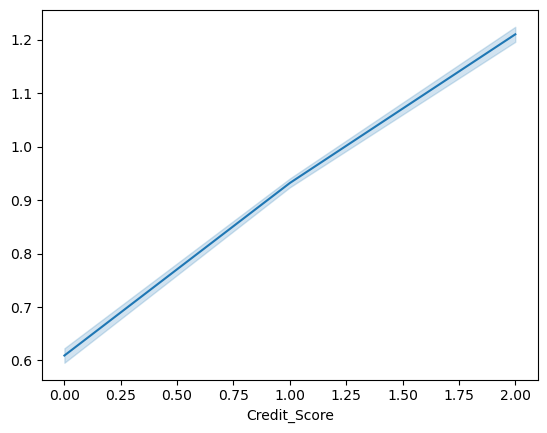

In [51]:
sns.lineplot(x=y_test,y=y_pred_lr)

In [ ]:
confusion_matrix(y_test,y_pred_lr)

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [53]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
pd.DataFrame({"actual_values":y_test,"predicted_values":y_pred_dt})

,actual_values,predicted_values
90340,0,0
75422,1,0
66839,1,0
16444,0,0
16890,1,2
...,...,...
94483,1,2
42260,1,1
55765,1,1
62976,2,2


In [58]:
accuracy_score(y_test,y_pred_dt)

0.6983645340464925

##### Hyperparameter Tuning on Decision Tree

In [59]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'max_features':['log2','sqrt','auto'],
              'criterion':['entropy','gini'],
              'max_depth':[2,3,5,10,50],
              'min_samples_split':[2,3,50,100],
              'min_samples_leaf':[1,5,8,10]}

grid_search = GridSearchCV(dt,parameters)
grid_search = grid_search.fit(x_train,y_train)
dt = grid_search.best_estimator_

dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [67]:
accuracy = round(accuracy_score(y_test,y_pred_dt)*100,2)
print('Accuracy of model is ',accuracy)

Accuracy of model is  69.43


In [62]:
confusion_matrix(y_test,y_pred_dt)

array([[3887, 1580,  207],
       [1609, 7765,  989],
       [ 169, 1391, 1847]], dtype=int64)

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rf = rfc.predict(x_test)
pd.DataFrame({"actual_values":y_test,"predicted_values":y_pred_rf})

,actual_values,predicted_values
90340,0,0
75422,1,0
66839,1,0
16444,0,0
16890,1,2
...,...,...
94483,1,2
42260,1,1
55765,1,1
62976,2,2


In [65]:
accuracy_score(y_test,y_pred_rf)

0.7905780703558939

In [66]:
confusion_matrix(y_test,y_pred_rf)

array([[4622, 1011,   41],
       [1274, 8418,  671],
       [  20, 1055, 2332]], dtype=int64)